# Global ("zero-dimensional") energy balance model - complete code

This notebook is intended for comparing to a working copy of the zero-dimensional energy balance model and helping you to "debug" your own code.

The following cell contains the complete code of the M-file script `run_model.m`. Note that the first line is only necessary in a Jupyter notebook. The reason is that in MATLAB/Octave a function has to be in a separate file, with the function name being the file name. Fortunately, the “%%file” magic in a Jupyter notebook allows us to write a code cell to a file.

In [13]:
%%file run_model.m

function run_model(Constants, RunParameters, ModelParameters)
% RUN_MODEL Direct model integration.
% RUN_MODEL directs the integration of the zero-dimensional energy-budget model.

% Author:           Andre Paul
% Written:          2011-11-30
% Last updated:     2019-10-31
%
% Dependencies:     none
%
% It is assumed that all run parameters, model parameters and initial
% conditions were set and all output files were opened prior to the call to 
% this M-file function.

% Retrieve constants and parameters in structure arrays
stefanBoltzmannConstant = Constants.stefanBoltzmannConstant;
pureWaterFreezingPoint  = Constants.pureWaterFreezingPoint;
deltaT                  = RunParameters.deltaT;
startTime               = RunParameters.startTime;
nTimeSteps              = RunParameters.nTimeSteps;
fileName                = RunParameters.fileName;
solarConstant           = ModelParameters.solarConstant;
planetaryAlbedo         = ModelParameters.planetaryAlbedo;
longwaveEmissivity      = ModelParameters.longwaveEmissivity;
effectiveHeatCapacity   = ModelParameters.effectiveHeatCapacity;
initialTemperature      = ModelParameters.initialTemperature;

% Set initial conditions
myTime      = startTime;
temperature = initialTemperature;

% Open output file
fileID = fopen(fileName, 'w');

% Write header of output file
fprintf(fileID, '%% Zero-dimensional global energy budget-climate model\n');
fprintf(fileID, '%% Column 1: time/a\n');
fprintf(fileID, '%% Column 2: global annual-mean surface temperature/degC\n');
fprintf(fileID, '%10.4f %10.4f\n', myTime/(86400.0*365.0), ...
                                   temperature - pureWaterFreezingPoint);

% Time loop (myIter = iteration counter)
for myIter=1:nTimeSteps
    
    % Record simulated time
    myTime = myTime + deltaT;

    % Calculate net shortwave radiation budget
    absorbedSolarRadiation = solarConstant/4.0*(1.0 - planetaryAlbedo);

    % Calculate net longwave radiation budget
    outgoingLongwaveRadiation = longwaveEmissivity* ...
                                stefanBoltzmannConstant*temperature^4;
                            
    % Calculate time rate of change of surface temperature
    temperatureTendency = ...
        (absorbedSolarRadiation - outgoingLongwaveRadiation)/ ...
        effectiveHeatCapacity;
    
    % Step global annual-mean surface temperature forward in time 
    % (by "Euler forward" or "forward-in-time" method)
    temperature  = temperature + temperatureTendency*deltaT;
    
    % Write current time and temperature to output file
    fprintf(fileID, '%10.4f %10.4f\n', myTime/(86400.0*365.0), ...
                                       temperature - pureWaterFreezingPoint);

end % end of time loop

% Close output file
fclose(fileID);

Created file '/Users/andre/Development/intro-to-octave/run_model.m'.


The following cell contains the complete code of the M-file script `ebm_0d.m`:

In [16]:
% EBM0D Zero-dimensional (global) energy balance model.
% EBM0D is a zero-dimensional energy balance model that calculates
% the global annual-mean surface temperature as a function time, using the
% Stefan-Boltzmann law and an effective longwave emissivity parameter for
% the outgoing longwave radiation.

% This version demonstrates the use of structure arrays as well as of an
% M-file function.
%
% Author:           Andre Paul
% Written:          2012-11-30
% Last updated:     2019-10-31
%
% Execution:        ebm_0d
% Dependencies:     run_model
%
% >> ebm_0d

% Set physical constants
stefanBoltzmannConstant = 5.67E-08; % Stefan-Boltzmann constant/(W m-2 K-1)                                
pureWaterFreezingPoint  = 273.15;   % pure water freezing point/K

% Set run parameters
deltaT     =    5.0*86400.0;        % time step/s
startTime  =    0.0;                % time to start integration/s
nTimeSteps = 3650;                  % total number of time steps
fileName   = 'results.txt';         % output file name

% Set model parameters
solarConstant         = 1360.8;     % solar constant of Earth/(W m-2)
planetaryAlbedo       = 0.3;        % average planetary albedo of Earth
longwaveEmissivity    = 0.60;       % longwave emissivity of Earth
effectiveHeatCapacity = 2.9526E08;  % effective heat capacity of the 
                                    % atmosphere-ocean system/(J m-2 K-1)
initialTemperature    = 0.0;        % initial temperature/K

% Store constants and parameters in structure arrays
Constants.stefanBoltzmannConstant      = stefanBoltzmannConstant;
Constants.pureWaterFreezingPoint       = pureWaterFreezingPoint;
RunParameters.deltaT                   = deltaT;
RunParameters.startTime                = startTime;
RunParameters.nTimeSteps               = nTimeSteps;
RunParameters.fileName                 = fileName;
ModelParameters.solarConstant          = solarConstant;
ModelParameters.planetaryAlbedo        = planetaryAlbedo;
ModelParameters.longwaveEmissivity     = longwaveEmissivity;
ModelParameters.effectiveHeatCapacity  = effectiveHeatCapacity;
ModelParameters.initialTemperature     = initialTemperature;

% Run model
run_model(Constants, RunParameters, ModelParameters);

The following cell contains the complete code of the M-file script `plot_results.m`:

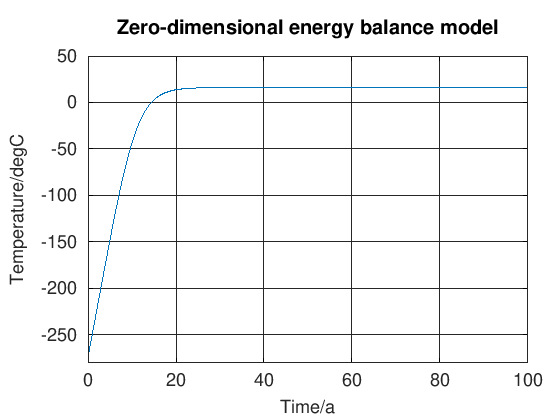

In [17]:
% PLOT_RESULTS Plot data from a text file.
% PLOT_RESULTS is a simple example of how to load some model results from a
% text file and plot it.

% Author:           Andre Paul
% Written:          2014-10-16
% Last updated:     2019-10-31
%
% Execution:        plot_results
% Dependencies:     none
%
% >> plot_results

% Open text file and load data
filename    = 'results.txt';
data        = load(filename);
time        = data(:, 1); % column 1: time/a
temperature = data(:, 2); % column 2: temperature/degC

% Plot the global annual-mean surface temperature as a function of time
figure
plot(time, temperature, 'LineWidth', 2);

% Display axes grid lines
grid on

% Set the plot limits
ylim([-280 50])

% Set the font size of the tick labels of the current axes
% ("gca" returns the handle to the current axes for the current figure)
set(gca, 'FontSize', 18)

% Make the labels
xlabel('Time/a', 'FontSize', 18)
ylabel('Temperature/degC', 'FontSize', 18)
title('Zero-dimensional energy balance model', ...
      'FontSize', 20)

The plot shows the evolution of the global-mean surface temeperature as simulated by the zero-dimensional global energy balance model with the default values of the model and run parameters.